In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
import wfdb
import datetime
# import pywt

In [2]:
record = wfdb.rdrecord('data/sleep-heart-health-study-psg-database-1.0.0/0000')

In [3]:
# similar to record, but different format and omits some information
# samp = wfdb.rdsamp('data/sleep-heart-health-study-psg-database-1.0.0/0000')

In [4]:
# record.get_write_fields()
record

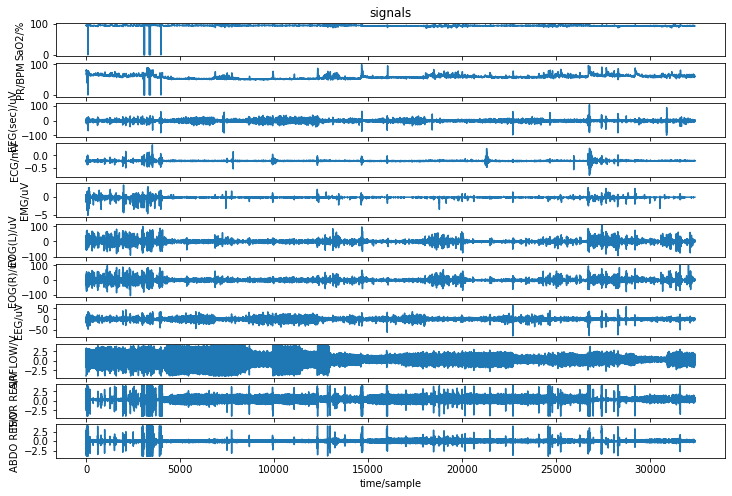

In [5]:
# plot signals
wfdb.plot_wfdb(record=record, title='signals', figsize=(12, 8))

In [7]:
record.__dict__

{'record_name': '0000',
 'n_sig': 11,
 'fs': 1,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 32399,
 'base_time': datetime.time(21, 30),
 'base_date': None,
 'comments': ['<age>: 47  <sex>: F  <BMI>: 29.73215'],
 'sig_name': ['SaO2',
  'PR',
  'EEG(sec)',
  'ECG',
  'EMG',
  'EOG(L)',
  'EOG(R)',
  'EEG',
  'AIRFLOW',
  'THOR RES',
  'ABDO RES'],
 'p_signal': array([[ 9.60111600e+01,  6.72646286e+01,  9.80392157e-01, ...,
         -3.98431373e+00,  1.56862745e+00,  2.82352941e-01],
        [ 9.60111600e+01,  6.72646286e+01,  3.92156863e+00, ...,
         -3.98431373e+00,  1.28627451e+00, -6.58823529e-01],
        [ 9.60111600e+01,  6.92627085e+01,  2.94117647e+00, ...,
         -3.98431373e+00, -5.33333333e-01, -3.76470588e+00],
        ...,
        [ 9.40130850e+01,  6.12825724e+01, -1.96078431e+00, ...,
         -8.47058824e-01,  6.27450980e-02, -1.56862745e-01],
        [ 9.40130850e+01,  6.12825724e+01,  4.90196078e+00, ...,
         -2.19607843e-01,  2.82352941e-01, -

Appears to be 9 hours of data with 1 sample per second (9\*60\*60 = 32400)

In [8]:
signals = record.p_signal
sig_names = record.sig_name

In [9]:
signals.shape

(32399, 11)

In [10]:
sig_names

['SaO2',
 'PR',
 'EEG(sec)',
 'ECG',
 'EMG',
 'EOG(L)',
 'EOG(R)',
 'EEG',
 'AIRFLOW',
 'THOR RES',
 'ABDO RES']

In [11]:
df = pd.DataFrame(signals, columns = sig_names)

In [12]:
df.head(3)

,SaO2,PR,EEG(sec),ECG,EMG,EOG(L),EOG(R),EEG,AIRFLOW,THOR RES,ABDO RES
0,96.01116,67.264629,0.980392,-0.266667,-0.000000,-38.235294,29.411765,-11.764706,-3.984314,1.568627,0.282353
1,96.01116,67.264629,3.921569,-0.211765,-1.458825,-17.647059,17.647059,-2.941176,-3.984314,1.286275,-0.658824
2,96.01116,69.262709,2.941176,-0.250980,-0.000000,14.705882,9.803922,2.941176,-3.984314,-0.533333,-3.764706


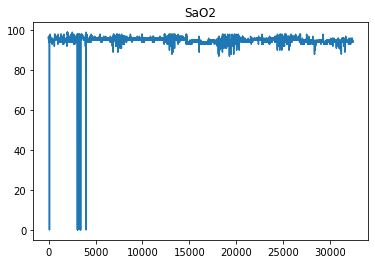

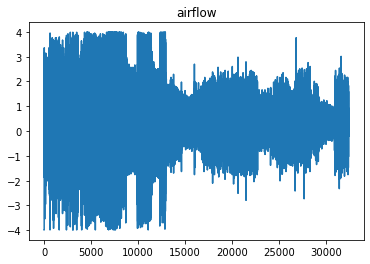

In [37]:
plt.figure()
plt.title('SaO2')
plt.plot(df.SaO2)

plt.figure()
plt.title('airflow')
plt.plot(df.AIRFLOW)
plt.show()

Seems to be outliers caused by error

In [14]:
df.SaO2.describe()

count    32399.000000
mean        95.008177
std          3.142611
min          0.201026
25%         94.013085
50%         95.012122
75%         96.011160
max         99.008273
Name: SaO2, dtype: float64

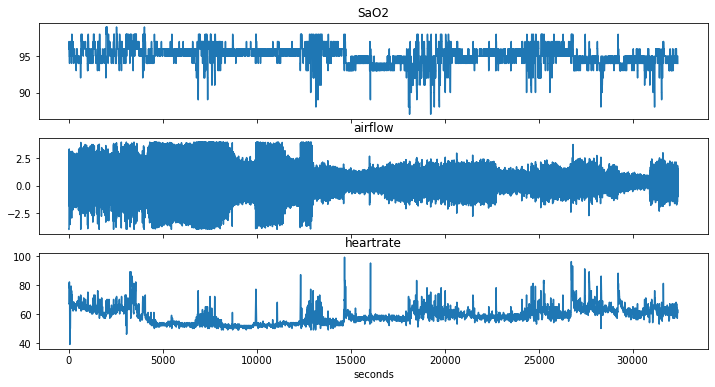

In [39]:
fig, axs = plt.subplots(3, 1, figsize=(12,6), sharey='row', sharex=True)

axs[0].set_title('SaO2')
axs[0].plot(df[df.SaO2 > 1].SaO2)

axs[1].set_title('airflow')
axs[1].plot(df[df.SaO2 > 1].AIRFLOW)

axs[2].set_title('heartrate')
axs[2].plot(df[df.SaO2 > 1].PR)

plt.xlabel('seconds')
plt.show()

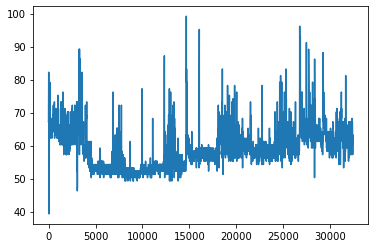

In [16]:
plt.plot(df[df.SaO2 > 1].PR)

In [17]:
df[df.SaO2 > 1].PR

0        67.264629
1        67.264629
2        69.262709
3        72.259828
4        78.241885
           ...    
32394    62.281612
32395    62.281612
32396    61.282572
32397    61.282572
32398    61.282572
Name: PR, Length: 32370, dtype: float64

In [21]:
df.head()

,SaO2,PR,EEG(sec),ECG,EMG,EOG(L),EOG(R),EEG,AIRFLOW,THOR RES,ABDO RES
0,96.011160,67.264629,0.980392,-0.266667,-0.000000,-38.235294,29.411765,-11.764706,-3.984314,1.568627,0.282353
1,96.011160,67.264629,3.921569,-0.211765,-1.458825,-17.647059,17.647059,-2.941176,-3.984314,1.286275,-0.658824
2,96.011160,69.262709,2.941176,-0.250980,-0.000000,14.705882,9.803922,2.941176,-3.984314,-0.533333,-3.764706
3,96.011160,72.259828,-0.000000,-0.203922,0.729412,-23.529412,9.803922,-5.882353,-2.070588,2.478431,0.501961
4,97.010197,78.241885,-7.843137,-0.227451,-0.000000,40.196078,-29.411765,6.862745,-0.062745,3.356863,2.415686


In [22]:
# wfdb.

In [23]:
# record

In [24]:
# generate test data

# zero = np.zeros([32399, 11])
# one = wfdb.io.Record(np.ones([32399, 11]))
# neg_one = wfdb.io.Record(-np.ones([32399, 11]))

In [25]:
# neg_one.convert_dtype

In [26]:
# fs = record[1]['fs']
# units = record[1]['units']
# wfdb.wrsamp(zero, fs=1, units=units, sig_name='zero', d_signal=zero.shape, fmt='csv', gain=[-164.158,
#   -82.0788,
#   -1.02,
#   -127.5,
#   -4.1129,
#   -1.02,
#   -1.02,
#   -1.02,
#   -31.875,
#   -31.875,
#   -31.875], baseline=[33, 33, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [27]:
# (zero, record[1])

In [28]:
from scipy.signal import find_peaks, peak_prominences

In [29]:
find_peaks(df.ECG)[0]

array([    1,     3,     7, ..., 32381, 32386, 32392], dtype=int64)

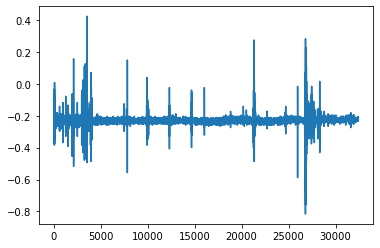

In [30]:

plt.plot(df.ECG)

In [31]:
ann = wfdb.rdann('data/sleep-heart-health-study-psg-database-1.0.0/0000', extension='comp')

In [32]:
len(ann.aux_note)

1391

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

def main_eda(file, outdir, **kwargs):
    
    os.makedirs(outdir, exist_ok = True)
    
    record = wfdb.rdsamp(file)
    wfdb.plot_wfdb(record=record, title='signals', figsize=(12, 8))
    df = pd.DataFrame(signals, columns = sig_names)
    
    
    fig, axs = plt.subplots(3, 1, figsize=(12,6), sharey='row', sharex=True)

    axs[0].set_title('SaO2')
    axs[0].plot(df[df.SaO2 > 1].SaO2)

    axs[1].set_title('airflow')
    axs[1].plot(df[df.SaO2 > 1].AIRFLOW)

    axs[2].set_title('heartrate')
    axs[2].plot(df[df.SaO2 > 1].PR)
    plt.savefig(os.path.join(outdir, 'eda.png'))
    plt.close()

In [ ]:
datetime.datetime.fromtimestamp(100)

In [ ]:
datetime.datetime.time()